<a href="https://colab.research.google.com/github/sraymundo15/sraymundo15/blob/master/1ml_Pipette_Data_and_Error_Analysis_Pchem_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard Weight & Volume Measurments - *Accounting for Data Uncertainty*

#### ASU Online Physical Chemistry Laboratory




*Jeff Yarger, School of Molecular Sciences, Arizona State University.*

jyarger@proton.me


# Introduction

Two of the most common experimental measurements in a chemical laboratory is weight (using a balance) and volume (commonly using a graduated cyclinder or pipette). An important skill in a scientific laboratory is the ability to estimate error or uncertainties in a measurement.  Consider for example that you want to measure the volume of a liquid using a graduated cylinder, and find the volume to be 292.5 mL. This number is subject to uncertainty: It is unthinkable that you could know the volume to be exactly 292.5000 mL rather than 292.5001 mL. The difference between the two is 0.1 $\mu$L, which would make a tiny drop hardly visible by the human eye. It is clear that you cannot measure with such precision using a graduated cylinder, as shown in figure 1.  

|       |          |
|-      |-         |
|![Figure 1](https://github.com/CHM343/Images/blob/main/Graduated_Cylinder_Example_Image.jpg?raw=true)| **Figure 1** - Picture of a graduated cylinder <br>for measuring the volume of a liquid. <br> The graduation marks on the glass cylinder <br>are calibrated for the volume in milliliters. <br> The meniscus of the liquid is between <br> the ticks for 290 mL and 295 mL.  <br>Therefore, we can estimate the volume <br>to be  half way between these graduation marks <br> with an estimated error associated with our ability <br>to estimate the volume, 292.5 mL $\pm$ 2.5 mL.|

It is often important to measure the volume in a more precise and accurate manner.  The most common method in a modern laboratory for volume measurement is to use a calibrated pipette (either manually or a modern automated liquid handler, e.g, physical chemistry lab uses the [OpenTron OT2 and Flex](https://opentrons.com/)).  A pipette routine check is commonly done using a high precision balance (gravimetric measurement).  Experimental data measurements saved as ascii (csv) files, using a 1 mL pipette and ($\pm$0.01 mg) resolution Mettler balance in the remote ASU physical chemistry lab is provided on the CHM343 Github Data repository.

*   [2024_08_24_Weight_1ml_Water_Pipette_Data.txt ](https://raw.githubusercontent.com/CHM343/Data/main/2024_08_24_Weight_1ml_Water_Pipette_Data.txt)

Determine the uncertainty in volume measurement for an OpenTron 1 mL pipette using the experimental data provided in the CHM343 Github Data repository.  After determining the uncertainty in volume and weight ($\pm$0.01 mg), use a standard propagation of error to provide a value for the calculated density of water and the associated uncertainty.


# Materials & Methods


The general method used is the standard gravimetric measurement.  A poster image provided by INTEGRA Biosciences Corp. is showing below to illustrate this standard and common method in detail.

<img src="https://github.com/CHM343/Images/blob/main/Routine_Pipette_Check_Poster.png?raw=true" width="350" alt="Pipette Routine Check" />

The ASU physical chemistry [OpenTron OT2](https://opentrons.com/) liquid handler with a 1 mL pipette tip was used and was set to fill 10 pre-weighted vials with 1 mL of water in each.  All weights were measured on a Mettler-Toledo XSR105 balance. The uncertainty in the Mettler-Toledo XSR105 balance is listed as $\pm$0.01 mg.  However, we can check this experimentally by measuring the same solid object (here we reweighted a sample vial) multiple times and calculating the standard deviation.  The experimental data set with 10 measurements of a vial is on the CHM343 Github Data repository with the filename: [2024_08_24_Weigh_Vial_10x_Data.txt](https://raw.githubusercontent.com/CHM343/Data/main/2024_08_24_Weigh_Vial_10x_Data.txt).


The measurement data for the 10 measurements of 1.0 mL of water dispensed from the OpenTron OT2 was recorded in a csv file and uploaded to the CHM343 Gibhub data repository with the filename: [2024_08_24_Weight_1ml_Water_Pipette_Data.txt](https://raw.githubusercontent.com/CHM343/Data/main/2024_08_24_Weight_1ml_Water_Pipette_Data.txt).



|       |          |
|-      |-         |
|![Figure 2](https://github.com/CHM343/Images/blob/main/MT_Balance_1mL_Water_Pipette_in_Vial.jpeg?raw=true)| **Figure 2** - Picture of the first of a weight <br> measurement of 10 vials filled with 1.0 mL <br> of water using the OpenTron automated pipette. <br> This experimet is designed to experimentally  <br> test the reproducibility of the OT2 1 mL pipette. <br> Standard statistical analysis can be used to  <br> determine the uncertainty (error) in volume. <br> The known properties of water (density) allow    <br> for both the precision and accuracy to be  <br> assessed.






All the data and error analysis will be done using Google Colaboratory (Jupyter).  Standard python will be used for the code and we will use common numpy, pandas, scipy and matplotlib python libraries.

# Data & Error Analysis

A summary for data and error analysis given below and the organization is to seperate major components into seperate code cells.



1.   Load python libraries
2.   Read in the data sets
3.   Display the data sets
4.   Plot the data sets
5.   Data and error analysis of the data sets
6.   Propagation of error for the weight and volume to determine the error in density.

### Load Python Libraries

In [1]:
# Load pandas and numpy libraries
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

### Read Data

Data is available on a public github repo (CHM343) and we will use pandas 'read_csv' function to read it directly from the public github repo.

In [2]:
# Load Balance reproducibility weight data from CHM343 Github using pandas read_csv function
Balance_Wt_Data = pd.read_csv('https://raw.githubusercontent.com/CHM343/Data/main/2024_08_24_Weigh_Vial_10x_Data.txt', sep=',', header=0)

# Load 1 mL pipette reproducibility data from CHM343 Github using pandas read_csv function
Pipette1ml_Data = pd.read_csv('https://raw.githubusercontent.com/CHM343/Data/main/2024_08_24_Weight_1ml_Water_Pipette_Data.txt', sep=',', header=0)

### Display Data

Data is loaded as a DataFrame and can be easily displayed in a readable format to allow quick visualization of the dataset. Colab displays the data in a similar manner to a spreadsheet (Excel, Sheets).

In [3]:
Balance_Wt_Data

,Measurement,Vial Weight (g)
0,1,3.27758
1,2,3.27758
2,3,3.27756
3,4,3.27755
4,5,3.27758
5,6,3.27761
6,7,3.27758
7,8,3.27755
8,9,3.27759
9,10,3.27756


In [4]:
Pipette1ml_Data

,Measurement,Volume (ml),Weight (g)
0,1,1.0,0.99777
1,2,1.0,0.99601
2,3,1.0,0.99768
3,4,1.0,0.99751
4,5,1.0,0.99606
5,6,1.0,0.99781
6,7,1.0,0.99611
7,8,1.0,0.99758
8,9,1.0,0.99682
9,10,1.0,0.99602


## Data and Error Analysis of Weight for a Standard Analytical Balance



In [5]:
# determine mean value of the measured vial weight using pandas
Balance_Wt_Mean = Balance_Wt_Data['Vial Weight (g)'].mean()

# determine standard deviation (population - ddof=0) with pandas and numpy.  Note if you want sample standard deviation (n-1), just set ddof=1.
Balance_Wt_SD = Balance_Wt_Data['Vial Weight (g)'].std(ddof=0)

# determine mean value uncertainty
Balance_Mean_Wt_SD = Balance_Wt_Data['Vial Weight (g)'].std(ddof=0)/np.sqrt(len(Balance_Wt_Data))

# Print mean and standard deviation values - 10 uL Pipette
print(f"Mean Vial Weight")
print(f"-----------------")
print(Balance_Wt_Mean)

print(f" ")

print(f"Standard Deviation")
print(f"-------------------")
print(Balance_Wt_SD)

print(f" ")

print(f"Report Mean value +/- uncertainty in mean - Vial Weight")
print(f"-------------------------------------------------------------------")
print(f"({Balance_Wt_Mean:.7f} +/- {Balance_Mean_Wt_SD:.7f}) g")

print(f" ")

print(f"Report Mean value +/- standard deviation uncertainty - Vial Weight")
print(f"-------------------------------------------------------------------")
print(f"({Balance_Wt_Mean:.6f} +/- {Balance_Wt_SD:.6f}) g")

print(f" ")

print(f"Report Mean value +/- 95% Confidence Level (2*SD) - Vial Weight")
print(f"-------------------------------------------------------------------")
print(f"({Balance_Wt_Mean:.6f} +/- {Balance_Wt_SD*2:.6f}) g")

print(f" ")

print(f"Report Mean value +/- 99.5% Confidence Level (3*SD) - Vial Weight")
print(f"-------------------------------------------------------------------")
print(f"({Balance_Wt_Mean:.6f} +/- {Balance_Wt_SD*3:.6f}) g")



Mean Vial Weight
-----------------
3.277574
 
Standard Deviation
-------------------
1.79999999999995e-05
 
Report Mean value +/- uncertainty in mean - Vial Weight
-------------------------------------------------------------------
(3.2775740 +/- 0.0000057) g
 
Report Mean value +/- standard deviation uncertainty - Vial Weight
-------------------------------------------------------------------
(3.277574 +/- 0.000018) g
 
Report Mean value +/- 95% Confidence Level (2*SD) - Vial Weight
-------------------------------------------------------------------
(3.277574 +/- 0.000036) g
 
Report Mean value +/- 99.5% Confidence Level (3*SD) - Vial Weight
-------------------------------------------------------------------
(3.277574 +/- 0.000054) g


### Plot Data

It is also useful to plot a histogram of the data to get a quick visualization of the distribution (uncertainty).

Text(0, 0.5, 'p(x)')

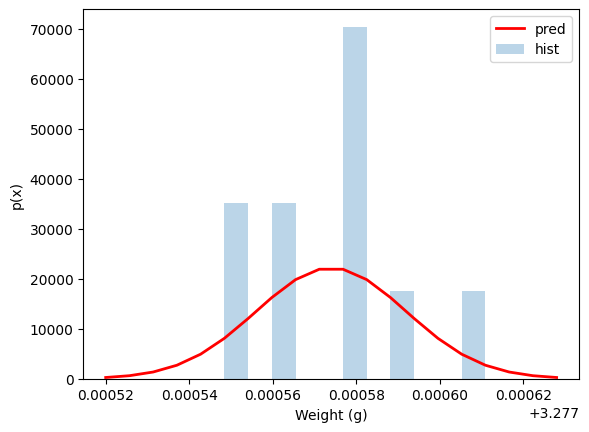

In [6]:
# Plot histogram
counts, bins, patches = plt.hist(Balance_Wt_Data['Vial Weight (g)'],
                                 bins=np.linspace(Balance_Wt_Mean-3*Balance_Wt_SD,Balance_Wt_Mean+3*Balance_Wt_SD,20),
                                 density=True, alpha=0.3)

plt.plot(bins, scs.norm.pdf(bins, Balance_Wt_Mean, Balance_Wt_SD), c='r', lw=2)

plt.legend(('pred','hist'))
plt.xlabel('Weight (g)')
plt.ylabel('p(x)')

Figure 3 - Histogram of the variation in reproducibility of weight for one of the empty vials, measured 10x, using the Mettler-Toledo XSR105 balance (blue bars).  The red curve shows the predicted normal distribution for the determined statistical standard deviation.

## Data and Error Analysis of Volume for the OT2 1 mL Automated Pipette

Using the example values above, show how the **numpy** python library can be used to easily determine the mean and standard deviation.

In [ ]:
# Determine mean value of the measured weight with pandas
# Determine standard deviation (population - ddof=0) with pandas and numpy.
# Note if you want sample standard deviation (n-1), just set ddof=1.
# Determine mean value uncertainty
Pipette1ml_Wt = Pipette1ml_Data['Weight (g)']
Pipette1ml_Mean_Wt = Pipette1ml_Wt.mean()
Pipette1ml_Wt_SD = Pipette1ml_Wt.std(ddof=0)
Pipette1ml_Wt_Mean_SD = Pipette1ml_Wt.std(ddof=0)/np.sqrt(len(Pipette1ml_Wt))

# Density of Water at 25C
d=0.997
Pipette1ml_Vol = Pipette1ml_Data['Weight (g)']/d

# determine mean value of the measured volumes with pandas
Pipette1ml_Mean_Vol = Pipette1ml_Vol.mean()

# determine standard deviation (population - ddof=0) with pandas and numpy.  Note if you want sample standard deviation (n-1), just set ddof=1.
Pipette1ml_Vol_SD = Pipette1ml_Vol.std(ddof=0)

# determine mean value uncertainty
Pipette1ml_Vol_Mean_SD = Pipette1ml_Vol.std(ddof=0)/np.sqrt(len(Pipette1ml_Vol))

# Print mean and standard deviation values - 1 mL Pipette Weight of Water
print(f"Mean - 1 mL Pipette Weight Water (g)")
print(f"-------------------------------------------")
print(Pipette1ml_Mean_Wt)

print(f" ")

print(f"Standard Deviation - 1 mL Pipette Weight of Water")
print(f"------------------------------------------------------")
print(Pipette1ml_Wt_SD)

print(f" ")

print(f"Report Mean value +/- uncertainty in mean - 1 mL Pipette Weight of Water")
print(f"------------------------------------------------------------------------")
print(f"({Pipette1ml_Mean_Wt:.5f} +/- {Pipette1ml_Wt_Mean_SD:.5f}) g")
print(f"* This error is NOT the random error associated with weight measurements.  It is higher and reflective of the uncertainty in volume reproducibility")

print(f" ")
print(f"--------------------")
print(f"--------------------")
print(f" ")

# Print mean and standard deviation values - 1 mL Pipette Volume
print(f"Mean - 1 mL Pipette Volume (mL)")
print(f"--------------------------------")
print(Pipette1ml_Mean_Vol)

print(f" ")

print(f"Standard Deviation - 1 mL Pipette")
print(f"----------------------------------")
print(Pipette1ml_Vol_SD)

print(f" ")

print(f"Report Mean value +/- uncertainty in mean - 1 mL Pipette")
print(f"----------------------------------------------------------")
print(f"({Pipette1ml_Mean_Vol:.5f} +/- {Pipette1ml_Vol_Mean_SD:.5f}) mL")

print(f" ")

print(f"Report Mean value +/- standard deviation uncertainty - 1 mL Pipette")
print(f"-------------------------------------------------------------------")
print(f"({Pipette1ml_Mean_Vol:.5f} +/- {Pipette1ml_Vol_SD:.5f}) mL")

print(f" ")

print(f"Report Mean value +/- 95% Confidence Level (2*SD) - 1 mL Pipette")
print(f"-------------------------------------------------------------------")
print(f"({Pipette1ml_Mean_Vol:.5f} +/- {Pipette1ml_Vol_SD*2:.5f}) mL")

print(f" ")

print(f"Report Mean value +/- 99.5% Confidence Level (3*SD) - 1 mL Pipette")
print(f"-------------------------------------------------------------------")
print(f"({Pipette1ml_Mean_Vol:.5f} +/- {Pipette1ml_Vol_SD*3:.5f}) mL")

Mean - 1 mL Pipette Weight Water (g)
-------------------------------------------
0.996937
 
Standard Deviation - 1 mL Pipette Weight of Water
------------------------------------------------------
0.0007692080342794235
 
Report Mean value +/- uncertainty in mean - 1 mL Pipette Weight of Water
------------------------------------------------------------------------
(0.99694 +/- 0.00024) g
* This error is NOT the random error associated with weight measurements.  It is higher and reflective of the uncertainty in volume reproducibility
 
--------------------
--------------------
 
Mean - 1 mL Pipette Volume (mL)
--------------------------------
0.9999368104312938
 
Standard Deviation - 1 mL Pipette
----------------------------------
0.000771522602085671
 
Report Mean value +/- uncertainty in mean - 1 mL Pipette
----------------------------------------------------------
(0.99994 +/- 0.00024) mL
 
Report Mean value +/- standard deviation uncertainty - 1 mL Pipette
--------------------------

### Plot Data

It is also useful to plot a histogram of the data to get a quick visualization of the distribution (uncertainty).

Text(0, 0.5, 'p(x)')

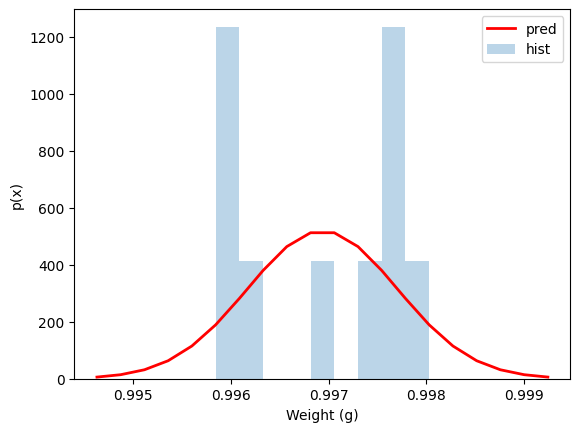

In [ ]:
# Plot histogram
counts, bins, patches = plt.hist(Pipette1ml_Data['Weight (g)'],
                                 bins=np.linspace(Pipette1ml_Mean_Wt-3*Pipette1ml_Wt_SD,Pipette1ml_Mean_Wt+3*Pipette1ml_Wt_SD,20),
                                 density=True, alpha=0.3)

plt.plot(bins, scs.norm.pdf(bins, Pipette1ml_Mean_Wt, Pipette1ml_Wt_SD), c='r', lw=2)

plt.legend(('pred','hist'))
plt.xlabel('Weight (g)')
plt.ylabel('p(x)')

Figure 4 - Histogram of the variation in reproducibility of 1 mL pipette volume measurement (1 mL of water pipetted and weighted). The red curve shows the predicted normal distribution for the determined statistical standard deviation.

# Calculating the Density of Water and Associated Error

## Introduction to Propagation of Error

Most physical quantities cannot be measured in a single direct measurement. Instead, they are calculated from quantities measured in different steps. For example, to measure the density of a substance one would measure its volume, its mass, and then calculate the density ($\rho$) from the definition:

<br>
\begin{equation}
\rho = \frac{mass}{Volume} =  \frac{m}{V}
\end{equation}
<br>


To calculate the uncertainty in the density, one must first determine the uncertainty in the measured quantities, $m$ and $V$, and **propagate** through the calculation.

Suppose that $x, ..., z$ are measured with uncertainties $\delta x, ..., \delta z$, and the measured values are used to compute a function $q(x, ..., z)$. If the uncertainties in $x, ..., z$ are independent and random, then the uncertainty in $q$ is

<br>
\begin{equation}
\delta q = \sqrt{ ( \frac{\partial q}{\partial x} \delta x  )^2 + ... + ( \frac{\partial q}{\partial z} \delta z  )^2 }
\end{equation}
<br>

In this equation, the term $\partial q / \partial x$ represents the partial derivative of $q$ with respect to $x$. If you need help calculating partial derivatives please is Appendix II or a general calculus book. You will need to be able to calculate partial derivatives in order to understand the reminder of this section.

For example, let's assume your goal is to calculate the density of a substance. You determine its mass $m \pm \delta m$ and its volume $V \pm \delta V$. You would calculate the density as $\rho = m/V$. But what about the uncertainty in the density?

Is $\delta \rho = \delta m / \delta V$?

Using the equation for error propagation we have:

<br>
\begin{equation}
 \frac{\partial q}{\partial m} = \frac{1}{V}
\end{equation}
<br>
\begin{equation}
 \frac{\partial q}{\partial V} = -\frac{m}{V^2}
\end{equation}
<br>
<br>
so,
\begin{equation}
\delta \rho = \sqrt{( \frac{1}{V} \delta m )^2  + ( - \frac{m}{V^2} \delta V  )^2}
\end{equation}
<br>


So, if m = (0.996937 $\pm$ 0.000054) g and V = (0.9999 $\pm$ 0.0023) mL (using the mean mass and volume values, and the 99.5\% confidence levels, $3\sigma$.)

<br>
\begin{equation}
\rho =  \frac{m}{V} = \frac{0.996937 g}{0.9999 mL} = 0.997037 \frac{g}{mL}
\end{equation}
<br>

and

<br>
\begin{equation}
\delta \rho = \sqrt{( \frac{1}{0.9999 mL} 0.000054 g )^2  + ( - \frac{0.996937 g}{(0.9999)^2 mL^2} 0.0023 mL  )^2 } =  0.002294 \frac{g}{mL}
\end{equation}
<br>

If we choose to report our propagated $3\sigma$ error with two significant figures, we would report the calculated density as:

<br>
\begin{equation}
\rho =  (0.9970 \pm 0.0023) \frac{g}{mL}
\end{equation}
<br>

Note that we used the same number of decimal places for the value and error.


In [ ]:
# Propagation of Error
# cymath: sqrt( (((1)/(0.9999))*0.000054)^2 + ((-0.996937)/((0.9999)^2)*0.0023)^2)

Mean_Density_Water_from_Mass_Volume_Measurements = Pipette1ml_Mean_Wt/Pipette1ml_Mean_Vol

Density_Propagation_Error_Mean_Std_Dev = np.sqrt((Balance_Mean_Wt_SD/Pipette1ml_Mean_Wt)**2+(Pipette1ml_Vol_Mean_SD/Pipette1ml_Mean_Vol)**2)*Pipette1ml_Mean_Wt/Pipette1ml_Mean_Vol

Density_Propagation_Error_3SD = np.sqrt((Balance_Wt_SD*3/Pipette1ml_Mean_Wt)**2+(Pipette1ml_Vol_SD*3/Pipette1ml_Mean_Vol)**2)*Pipette1ml_Mean_Wt/Pipette1ml_Mean_Vol

# Print mean and standard deviation values - 1 mL Pipette Weight of Water
print(f"Density Mean SD Error")
print(f"----------------------")
print(Density_Propagation_Error_Mean_Std_Dev)

print(f" ")

print(f"Density 3SD Error")
print(f"----------------------")
print(Density_Propagation_Error_3SD)

print(f" ")

print(f"Report Mean value +/- uncertainty in mean - Density of Water")
print(f"-------------------------------------------------------------")
print(f"({Mean_Density_Water_from_Mass_Volume_Measurements:.4f} +/- {Density_Propagation_Error_Mean_Std_Dev:.4f}) g/mL")

print(f" ")

print(f"Report Mean value +/- 3-sigma uncertainty (99.5% Confidence Level) - Density of Water")
print(f"--------------------------------------------------------------------------------------")
print(f"({Mean_Density_Water_from_Mass_Volume_Measurements:.4f} +/- {Density_Propagation_Error_3SD:.4f}) g/mL")




Density Mean SD Error
----------------------
0.00024332690442557524
 
Density 3SD Error
----------------------
0.002308401701948769
 
Report Mean value +/- uncertainty in mean - Density of Water
-------------------------------------------------------------
(0.9970 +/- 0.0002) g/mL
 
Report Mean value +/- 3-sigma uncertainty (99.5% Confidence Level) - Density of Water
--------------------------------------------------------------------------------------
(0.9970 +/- 0.0023) g/mL


In [11]:
#Ethanol Propagation of Error

# Define Variables
Ethanol_Volume = 1.0
Ethanol_Volume_Error = 0.1
Ethanol_Weight = 0.8
Ethanol_Weight_Error = 0.1

# Calculate Density
Ethanol_Density = Ethanol_Weight/Ethanol_Volume

#Calculate Error Propagation
Ethanol_Error_Propagation = np.sqrt((Ethanol_Weight_Error/Ethanol_Volume)**2+(-((Ethanol_Weight/(Ethanol_Volume**2)))*Ethanol_Volume_Error)**2)

# Print Error Propagation
print(f"Ethanol Error Propagation")
print(f"----------------------")
print(f"{Ethanol_Error_Propagation:.1f} g/ml")

Ethanol Error Propagation
----------------------
0.1 g/ml


# Results & Discussion

We are provided two sets of experimental measurement data.  The first is a set of 10 measurements of a vial using the Mettler-Toledo XSR105 balance to experimentally verify the manufactures reported uncertainty of balance $\pm$0.01 mg.  The second data set uses the Mettler-Toledo XSR105 balance to weight 10 vials of water which each were dispensed from the OpenTron OT2 using the same 1 mL pipette. Figure 2 shows a picture of the first of the ten measurements. These two data sets are designed as experimental tests of the reproducibility of a modern analytical balance and a modern liquid handler (automated pipette system).

The uncertainty in the weight was verified to be $\pm$0.01 mg (mean standard deviation) and the uncertainty in the volume for the OT2 automated 1 mL pipette was found to be $\pm$0.24 $\mu$L (mean standard deviation).  The mean standard deviation often represents a small estimate of the error and it is common to use the 95\% (2$\sigma$) or 99.5\% (3$\sigma$) confidence level.  The 99.5\% (3$\sigma$) confidence level results are listed below and the values that are recommended to report in scientific reports.



*   Weight (0-41g) - Mettler-Toledo XSR105 balance: $\pm$0.054 mg
*   Volume (1 mL) - OT2 Automated Pipette of Water (Aqueous):  $\pm$2.3 $\mu$L

This illustrates how a modern analytical balance to measure weight is significantly more precise (less uncertainty) than measurement of liquid volume using a modern automated pipette.


# References



1.   Kyle Cranmer, Statistics and Data Science, [Jupyter{Book}](https://theoryandpractice.org/stats-ds-book/intro.html), https://github.com/cranmer/stats-ds-book.
2.   Jeff Yarger, [Error Analysis Review](https://biopchem.education/wp-content/uploads/2021/08/error_analysis_review.pdf), biopchem.education.

